In [53]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
from tensorflow.keras.regularizers import l2

In [54]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.models import load_model

In [55]:
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    print("Using GPU for computations")
else:
    print("No GPU found, using CPU")

Using GPU for computations


In [56]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

# Split Training Data into Train and Validation Sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [62]:
model3 = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3), kernel_regularizer=l2(1e-4)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.4),

    layers.Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(1e-4)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(1e-4)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.2),

    layers.Flatten(),
    layers.Dense(256, activation='relu', kernel_regularizer=l2(1e-4)),
    layers.Dropout(0.4),
    layers.Dense(10, activation='softmax')
])

model3.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [63]:
with tf.device('/GPU:0'):
    history3 = model3.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), batch_size=64)

Epoch 1/20
625/625 [==============================] - 7s 10ms/step - loss: 1.7871 - accuracy: 0.3847 - val_loss: 1.7486 - val_accuracy: 0.4432
Epoch 2/20
625/625 [==============================] - 6s 9ms/step - loss: 1.4230 - accuracy: 0.5176 - val_loss: 1.4444 - val_accuracy: 0.5450
Epoch 3/20
625/625 [==============================] - 6s 10ms/step - loss: 1.2657 - accuracy: 0.5788 - val_loss: 1.1530 - val_accuracy: 0.6180
Epoch 4/20
625/625 [==============================] - 6s 10ms/step - loss: 1.1567 - accuracy: 0.6219 - val_loss: 1.0580 - val_accuracy: 0.6590
Epoch 5/20
625/625 [==============================] - 6s 10ms/step - loss: 1.0992 - accuracy: 0.6465 - val_loss: 1.0623 - val_accuracy: 0.6650
Epoch 6/20
625/625 [==============================] - 6s 10ms/step - loss: 1.0427 - accuracy: 0.6682 - val_loss: 0.9225 - val_accuracy: 0.7138
Epoch 7/20
625/625 [==============================] - 6s 10ms/step - loss: 1.0140 - accuracy: 0.6835 - val_loss: 1.1608 - val_accuracy: 0.6529


In [64]:
with tf.device('/GPU:0'):
    test_loss, test_accuracy = model3.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Test Loss: 0.963718831539154
Test Accuracy: 0.7555999755859375


In [65]:
with tf.device('/GPU:0'):
    y_pred = model3.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

report = classification_report(y_test, y_pred_classes, target_names=[
    "airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"
])
print(f"\nClassification Report:\n{report}")

313/313 [==============================] - 1s 4ms/step

Classification Report:
              precision    recall  f1-score   support

    airplane       0.81      0.81      0.81      1000
  automobile       0.89      0.89      0.89      1000
        bird       0.59      0.73      0.65      1000
         cat       0.63      0.48      0.55      1000
        deer       0.72      0.68      0.70      1000
         dog       0.75      0.55      0.63      1000
        frog       0.64      0.92      0.75      1000
       horse       0.89      0.77      0.83      1000
        ship       0.83      0.91      0.87      1000
       truck       0.89      0.81      0.85      1000

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.75     10000
weighted avg       0.76      0.76      0.75     10000



In [66]:
model3.save('./base_model')

INFO:tensorflow:Assets written to: ./base_model\assets


INFO:tensorflow:Assets written to: ./base_model\assets


In [67]:
final_model = load_model('./base_model')

In [68]:
with tf.device('/GPU:0'):
    y_pred = final_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

report = classification_report(y_test, y_pred_classes, target_names=[
    "airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"
])
print(f"\nClassification Report:\n{report}")

313/313 [==============================] - 1s 4ms/step

Classification Report:
              precision    recall  f1-score   support

    airplane       0.81      0.81      0.81      1000
  automobile       0.89      0.89      0.89      1000
        bird       0.59      0.73      0.65      1000
         cat       0.63      0.48      0.55      1000
        deer       0.72      0.68      0.70      1000
         dog       0.75      0.55      0.63      1000
        frog       0.64      0.92      0.75      1000
       horse       0.89      0.77      0.83      1000
        ship       0.83      0.91      0.87      1000
       truck       0.89      0.81      0.85      1000

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.75     10000
weighted avg       0.76      0.76      0.75     10000



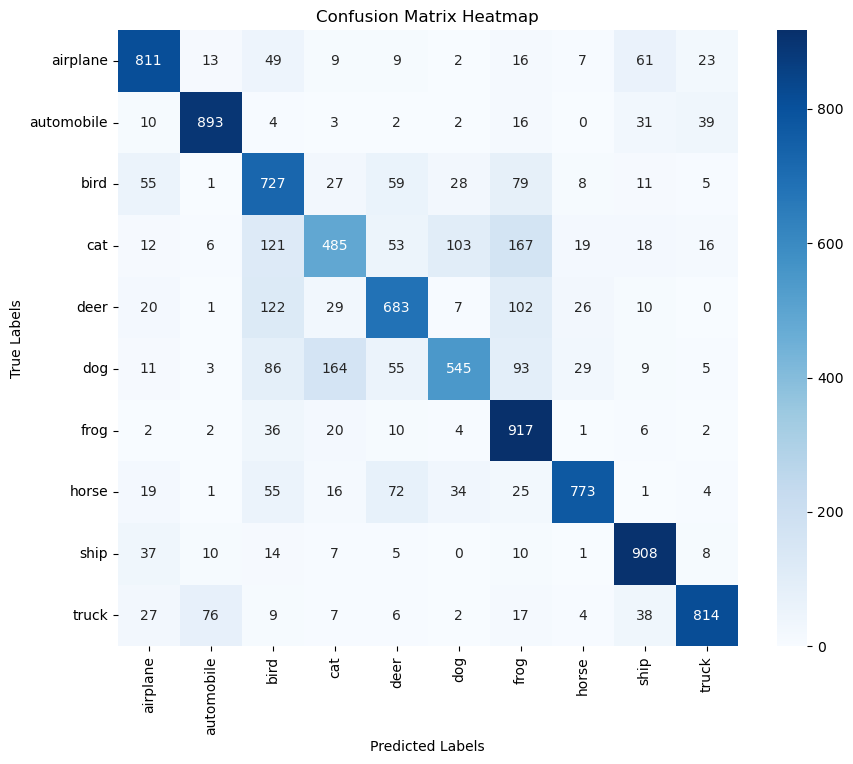

In [69]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[
    "airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"
], yticklabels=[
    "airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"
])
plt.title("Confusion Matrix Heatmap")
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")
plt.show()